In [1]:
import os 
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_paths = glob("dataset/cifar/train/*.png")
path = data_paths[0]

In [10]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [11]:
image.shape

TensorShape([32, 32, 3])

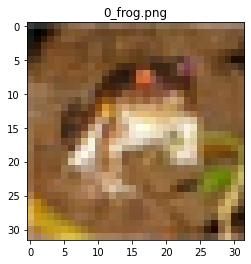

In [12]:
plt.title(os.path.basename(path))
plt.imshow(image)
plt.show()

# tf.data

In [6]:
train_paths = glob('../../dataset/cifar/cifar/train/*.png')
train_paths[:10]

['../../dataset/cifar/cifar/train\\0_frog.png',
 '../../dataset/cifar/cifar/train\\10000_automobile.png',
 '../../dataset/cifar/cifar/train\\10001_frog.png',
 '../../dataset/cifar/cifar/train\\10002_frog.png',
 '../../dataset/cifar/cifar/train\\10003_ship.png',
 '../../dataset/cifar/cifar/train\\10004_ship.png',
 '../../dataset/cifar/cifar/train\\10005_cat.png',
 '../../dataset/cifar/cifar/train\\10006_deer.png',
 '../../dataset/cifar/cifar/train\\10007_frog.png',
 '../../dataset/cifar/cifar/train\\10008_airplane.png']

In [14]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image

In [18]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)

In [21]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

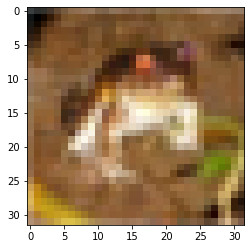

In [22]:
plt.imshow(tf_image)
plt.show()

In [43]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

## Batch로 묶기

In [24]:
batch_size = 8
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)

In [26]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([8, 32, 32, 3])

## Shuffle 하기

In [29]:

dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffer_size=len(data_paths))

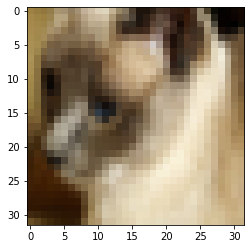

In [31]:
tf_images = next(iter(dataset))

plt.imshow(tf_images[0])
plt.show()

## Label하고 같이 넣기 

In [32]:
path

'dataset/cifar/train\\0_frog.png'

In [34]:
class_name = path.split("_")[-1].replace(".png","")

In [37]:
def get_label(path):
    cls_name = path.split("_")[-1].replace(".png","")
    return cls_name

In [38]:
path, get_label(path)

('dataset/cifar/train\\0_frog.png', 'frog')

In [39]:
label_names = [get_label(path) for path in data_paths]

In [43]:
class_names = np.unique(label_names)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [45]:
onehot_encodings = np.array(class_names=="frog", np.uint8)
onehot_encodings

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

## tensorflow 함수로 label 얻기

In [59]:
path

'../../dataset/cifar/cifar/train\\0_frog.png'

In [70]:
fname = tf.strings.split(path, '_')[-1]
lbl_name = tf.strings.regex_replace(fname, '.png', '')
lbl_name

<tf.Tensor: id=1516, shape=(), dtype=string, numpy=b'frog'>

In [71]:
onehot = tf.cast(lbl_name == class_names, tf.uint8)
onehot

<tf.Tensor: id=1519, shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

In [72]:
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    onehot = tf.cast(lbl_name == class_names, tf.uint8)
    return onehot

In [73]:
def load_image_label(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    label = get_label(path)
    return image, label

In [75]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(load_image_label, num_parallel_calls=AUTOTUNE)
dataset = dataset.batch(4)
dataset = dataset.shuffle(buffer_size=len(train_paths))
dataset = dataset.repeat()

In [76]:
image, label = next(iter(dataset))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


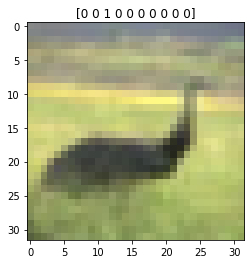

In [77]:
plt.title(np.array(label[0]))
plt.imshow(image[0])
plt.show()